In [485]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from numpy.random import randn
from scipy.stats import shapiro, spearmanr

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'C:/Users/vlad1/Desktop/Рабочий стол/ML/Employers/Deeplay/Players.xlsx'

data = pd.read_excel(path)
data

,player,stat1,stat2,stat3,stat4,stat5,stat6,stat7,stat8,stat9,...,stat118,stat119,stat120,stat121,stat122,stat123,stat124,stat125,stat126,stat127
0,player1,0.000057,0.463585,NaN,0.269454,0.080972,NaN,0.480818,NaN,0.058824,...,0.433083,0.189568,0.393393,0.295057,0.251447,0.217143,NaN,0.287408,NaN,NaN
1,player2,0.000258,0.451477,NaN,0.280188,0.053763,NaN,0.449686,NaN,0.060870,...,0.419728,0.156165,0.403475,0.232939,0.149836,0.136318,NaN,0.242417,NaN,NaN
2,player3,0.000000,0.394161,NaN,0.259720,0.093137,NaN,0.498138,NaN,0.060150,...,0.424702,0.178597,0.374286,0.263825,0.258818,0.264657,NaN,0.264686,NaN,NaN
3,player4,0.000000,0.595941,NaN,0.285093,0.106122,NaN,0.409406,NaN,0.094595,...,0.405199,0.223855,0.410256,0.334586,0.270078,0.002787,NaN,0.250378,NaN,NaN
4,player5,0.000053,0.474469,NaN,0.237012,0.069284,NaN,0.464455,NaN,0.069588,...,0.447303,0.200082,0.364122,0.272970,0.307973,0.010024,NaN,0.284349,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,player543,0.000189,0.534304,NaN,0.303557,0.075136,NaN,0.627917,NaN,0.068460,...,0.395435,0.186000,0.436798,0.266040,0.243204,0.001825,NaN,0.235458,NaN,NaN
543,player544,0.000308,0.458941,NaN,0.219156,0.051532,NaN,0.449095,NaN,0.034483,...,0.427721,0.168777,0.506645,0.230414,0.209977,0.372106,NaN,0.278913,NaN,NaN
544,player545,0.000062,0.605558,NaN,0.286586,0.049505,NaN,0.417582,NaN,0.022222,...,0.358848,0.188563,0.465753,0.257146,0.257113,0.008716,NaN,0.221611,NaN,NaN
545,player546,0.000000,0.437931,NaN,0.251155,0.049327,NaN,0.672457,NaN,0.035714,...,0.414645,0.202812,0.293333,0.338469,0.232558,0.003523,NaN,0.224957,NaN,NaN


In [3]:
data['stat3'].values[0]

nan

In [304]:
# Создаём копию, с которой далее будем работать
data_stat = data.copy()
data_stat.drop(['player'], inplace=True, axis=1)
data_stat

,stat1,stat2,stat3,stat4,stat5,stat6,stat7,stat8,stat9,stat10,...,stat118,stat119,stat120,stat121,stat122,stat123,stat124,stat125,stat126,stat127
0,0.000057,0.463585,NaN,0.269454,0.080972,NaN,0.480818,NaN,0.058824,NaN,...,0.433083,0.189568,0.393393,0.295057,0.251447,0.217143,NaN,0.287408,NaN,NaN
1,0.000258,0.451477,NaN,0.280188,0.053763,NaN,0.449686,NaN,0.060870,NaN,...,0.419728,0.156165,0.403475,0.232939,0.149836,0.136318,NaN,0.242417,NaN,NaN
2,0.000000,0.394161,NaN,0.259720,0.093137,NaN,0.498138,NaN,0.060150,NaN,...,0.424702,0.178597,0.374286,0.263825,0.258818,0.264657,NaN,0.264686,NaN,NaN
3,0.000000,0.595941,NaN,0.285093,0.106122,NaN,0.409406,NaN,0.094595,NaN,...,0.405199,0.223855,0.410256,0.334586,0.270078,0.002787,NaN,0.250378,NaN,NaN
4,0.000053,0.474469,NaN,0.237012,0.069284,NaN,0.464455,NaN,0.069588,NaN,...,0.447303,0.200082,0.364122,0.272970,0.307973,0.010024,NaN,0.284349,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.000189,0.534304,NaN,0.303557,0.075136,NaN,0.627917,NaN,0.068460,NaN,...,0.395435,0.186000,0.436798,0.266040,0.243204,0.001825,NaN,0.235458,NaN,NaN
543,0.000308,0.458941,NaN,0.219156,0.051532,NaN,0.449095,NaN,0.034483,NaN,...,0.427721,0.168777,0.506645,0.230414,0.209977,0.372106,NaN,0.278913,NaN,NaN
544,0.000062,0.605558,NaN,0.286586,0.049505,NaN,0.417582,NaN,0.022222,NaN,...,0.358848,0.188563,0.465753,0.257146,0.257113,0.008716,NaN,0.221611,NaN,NaN
545,0.000000,0.437931,NaN,0.251155,0.049327,NaN,0.672457,NaN,0.035714,NaN,...,0.414645,0.202812,0.293333,0.338469,0.232558,0.003523,NaN,0.224957,NaN,NaN


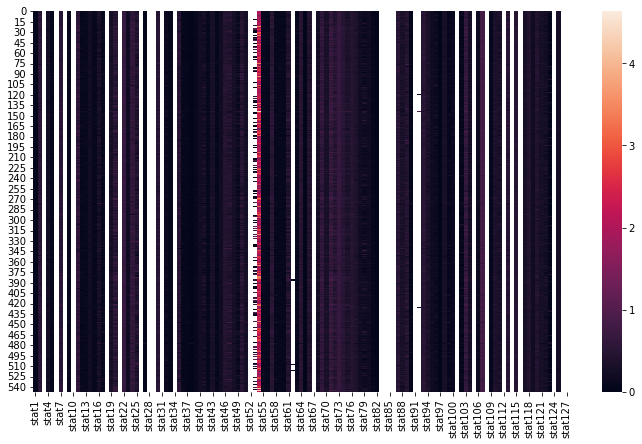

In [305]:
# Визуализируем пропуски
plt.figure(figsize=(12,7))
sns.heatmap(data_stat)
plt.show()

**Видно, что пропусков много, поэтому будем с ними бороться**

In [306]:
data_stat.columns

Index(['stat1', 'stat2', 'stat3', 'stat4', 'stat5', 'stat6', 'stat7', 'stat8',
       'stat9', 'stat10',
       ...
       'stat118', 'stat119', 'stat120', 'stat121', 'stat122', 'stat123',
       'stat124', 'stat125', 'stat126', 'stat127'],
      dtype='object', length=127)

# EDA

## Борьба с пропусками

In [307]:
# Функция формирования словаря пропусков

def get_pass_dict(data):
    
    pass_dict = {}

    for col in data.columns:
        pass_count = data[col].isna().sum()
        pass_dict[col] = (pass_count/len(data))*100
        
    return pass_dict

In [308]:
# Функция формирования списка атрибутов на удаления

def get_drop_list(pass_dict, margin):

    '''
    Input:
        pass_dict - словарь пропусков
        margin - порог
        
    Output:
        drop_list - список названий колонок, которые нужно удалить
    '''       
    
    drop_list = []

    for key in pass_dict.keys():
        if pass_dict[key] > margin:
            drop_list.append(key)
    
    return drop_list

In [309]:
# функция удаления колонок по заданному списку

def del_col(drop_list, data):
    
    '''
    Input:
        drop_list - список колонок на удаление
        data - датафрейм       
    '''       
    
    for col in drop_list:
        data.drop([col], inplace=True, axis=1)


In [310]:
data_stat.head()

,stat1,stat2,stat3,stat4,stat5,stat6,stat7,stat8,stat9,stat10,...,stat118,stat119,stat120,stat121,stat122,stat123,stat124,stat125,stat126,stat127
0,0.000057,0.463585,NaN,0.269454,0.080972,NaN,0.480818,NaN,0.058824,NaN,...,0.433083,0.189568,0.393393,0.295057,0.251447,0.217143,NaN,0.287408,NaN,NaN
1,0.000258,0.451477,NaN,0.280188,0.053763,NaN,0.449686,NaN,0.060870,NaN,...,0.419728,0.156165,0.403475,0.232939,0.149836,0.136318,NaN,0.242417,NaN,NaN
2,0.000000,0.394161,NaN,0.259720,0.093137,NaN,0.498138,NaN,0.060150,NaN,...,0.424702,0.178597,0.374286,0.263825,0.258818,0.264657,NaN,0.264686,NaN,NaN
3,0.000000,0.595941,NaN,0.285093,0.106122,NaN,0.409406,NaN,0.094595,NaN,...,0.405199,0.223855,0.410256,0.334586,0.270078,0.002787,NaN,0.250378,NaN,NaN
4,0.000053,0.474469,NaN,0.237012,0.069284,NaN,0.464455,NaN,0.069588,NaN,...,0.447303,0.200082,0.364122,0.272970,0.307973,0.010024,NaN,0.284349,NaN,NaN


In [311]:
# получаем словарь с долей пропусков по каждой колонке

pass_dict = get_pass_dict(data_stat)
pass_dict

{'stat1': 0.0,
 'stat2': 0.0,
 'stat3': 100.0,
 'stat4': 0.0,
 'stat5': 0.0,
 'stat6': 100.0,
 'stat7': 0.0,
 'stat8': 100.0,
 'stat9': 0.3656307129798903,
 'stat10': 100.0,
 'stat11': 0.0,
 'stat12': 0.0,
 'stat13': 0.0,
 'stat14': 0.0,
 'stat15': 0.0,
 'stat16': 0.0,
 'stat17': 0.0,
 'stat18': 100.0,
 'stat19': 0.0,
 'stat20': 0.0,
 'stat21': 100.0,
 'stat22': 0.0,
 'stat23': 0.0,
 'stat24': 0.0,
 'stat25': 0.0,
 'stat26': 100.0,
 'stat27': 0.0,
 'stat28': 100.0,
 'stat29': 100.0,
 'stat30': 0.0,
 'stat31': 100.0,
 'stat32': 0.0,
 'stat33': 0.0,
 'stat34': 100.0,
 'stat35': 0.0,
 'stat36': 0.0,
 'stat37': 0.0,
 'stat38': 0.0,
 'stat39': 0.0,
 'stat40': 0.0,
 'stat41': 0.0,
 'stat42': 0.0,
 'stat43': 0.0,
 'stat44': 0.0,
 'stat45': 0.0,
 'stat46': 0.0,
 'stat47': 0.0,
 'stat48': 0.0,
 'stat49': 0.0,
 'stat50': 0.0,
 'stat51': 0.0,
 'stat52': 100.0,
 'stat53': 67.64168190127971,
 'stat54': 0.0,
 'stat55': 0.0,
 'stat56': 0.0,
 'stat57': 0.0,
 'stat58': 0.0,
 'stat59': 0.0,
 'stat60': 0

In [312]:
# получаем список колонок на удаление

drop_list = get_drop_list(pass_dict, 10)
print(drop_list)

['stat3', 'stat6', 'stat8', 'stat10', 'stat18', 'stat21', 'stat26', 'stat28', 'stat29', 'stat31', 'stat34', 'stat52', 'stat53', 'stat62', 'stat67', 'stat83', 'stat84', 'stat85', 'stat86', 'stat91', 'stat92', 'stat101', 'stat105', 'stat108', 'stat112', 'stat114', 'stat116', 'stat124', 'stat126', 'stat127']


In [313]:
# удаляем колонки по сформированному списку

del_col(drop_list, data_stat)
data_stat.head()

,stat1,stat2,stat4,stat5,stat7,stat9,stat11,stat12,stat13,stat14,...,stat113,stat115,stat117,stat118,stat119,stat120,stat121,stat122,stat123,stat125
0,0.000057,0.463585,0.269454,0.080972,0.480818,0.058824,0.428506,0.098841,0.117632,0.185914,...,0.461219,0.464881,0.304522,0.433083,0.189568,0.393393,0.295057,0.251447,0.217143,0.287408
1,0.000258,0.451477,0.280188,0.053763,0.449686,0.060870,0.557598,0.084276,0.051277,0.242729,...,0.449231,0.447159,0.282449,0.419728,0.156165,0.403475,0.232939,0.149836,0.136318,0.242417
2,0.000000,0.394161,0.259720,0.093137,0.498138,0.060150,0.553648,0.056404,0.115620,0.214368,...,0.395091,0.458876,0.290208,0.424702,0.178597,0.374286,0.263825,0.258818,0.264657,0.264686
3,0.000000,0.595941,0.285093,0.106122,0.409406,0.094595,0.503968,0.044787,0.123180,0.237851,...,0.589512,0.421272,0.280153,0.405199,0.223855,0.410256,0.334586,0.270078,0.002787,0.250378
4,0.000053,0.474469,0.237012,0.069284,0.464455,0.069588,0.584513,0.059305,0.120600,0.211230,...,0.473045,0.435530,0.307592,0.447303,0.200082,0.364122,0.272970,0.307973,0.010024,0.284349


In [314]:
# получаем словарь с долей пропусков по каждой колонке

pass_dict = get_pass_dict(data_stat)
pass_dict

{'stat1': 0.0,
 'stat2': 0.0,
 'stat4': 0.0,
 'stat5': 0.0,
 'stat7': 0.0,
 'stat9': 0.3656307129798903,
 'stat11': 0.0,
 'stat12': 0.0,
 'stat13': 0.0,
 'stat14': 0.0,
 'stat15': 0.0,
 'stat16': 0.0,
 'stat17': 0.0,
 'stat19': 0.0,
 'stat20': 0.0,
 'stat22': 0.0,
 'stat23': 0.0,
 'stat24': 0.0,
 'stat25': 0.0,
 'stat27': 0.0,
 'stat30': 0.0,
 'stat32': 0.0,
 'stat33': 0.0,
 'stat35': 0.0,
 'stat36': 0.0,
 'stat37': 0.0,
 'stat38': 0.0,
 'stat39': 0.0,
 'stat40': 0.0,
 'stat41': 0.0,
 'stat42': 0.0,
 'stat43': 0.0,
 'stat44': 0.0,
 'stat45': 0.0,
 'stat46': 0.0,
 'stat47': 0.0,
 'stat48': 0.0,
 'stat49': 0.0,
 'stat50': 0.0,
 'stat51': 0.0,
 'stat54': 0.0,
 'stat55': 0.0,
 'stat56': 0.0,
 'stat57': 0.0,
 'stat58': 0.0,
 'stat59': 0.0,
 'stat60': 0.0,
 'stat61': 0.0,
 'stat63': 0.0,
 'stat64': 0.0,
 'stat65': 0.0,
 'stat66': 0.0,
 'stat68': 0.0,
 'stat69': 0.0,
 'stat70': 0.0,
 'stat71': 0.0,
 'stat72': 0.0,
 'stat73': 0.0,
 'stat74': 0.0,
 'stat75': 0.0,
 'stat76': 0.0,
 'stat77': 0.0,

**Есть несколько колонок, где нехватает всего пары значений -> заполним данные пропуски средними значениями по их колонкам**

In [315]:
fill_col_list = get_drop_list(pass_dict, 0)
fill_col_list

['stat9', 'stat80', 'stat106']

In [316]:
data_stat['stat9'].mean()

0.056330215447017364

In [317]:
# заменяем пропуски средними значениями по их колонкам

for col in fill_col_list:
    
    mean_v =  data_stat[col].mean()
    data_stat[col] = data_stat[col].fillna(mean_v)
    
pass_dict = get_pass_dict(data_stat)
pass_dict    

{'stat1': 0.0,
 'stat2': 0.0,
 'stat4': 0.0,
 'stat5': 0.0,
 'stat7': 0.0,
 'stat9': 0.0,
 'stat11': 0.0,
 'stat12': 0.0,
 'stat13': 0.0,
 'stat14': 0.0,
 'stat15': 0.0,
 'stat16': 0.0,
 'stat17': 0.0,
 'stat19': 0.0,
 'stat20': 0.0,
 'stat22': 0.0,
 'stat23': 0.0,
 'stat24': 0.0,
 'stat25': 0.0,
 'stat27': 0.0,
 'stat30': 0.0,
 'stat32': 0.0,
 'stat33': 0.0,
 'stat35': 0.0,
 'stat36': 0.0,
 'stat37': 0.0,
 'stat38': 0.0,
 'stat39': 0.0,
 'stat40': 0.0,
 'stat41': 0.0,
 'stat42': 0.0,
 'stat43': 0.0,
 'stat44': 0.0,
 'stat45': 0.0,
 'stat46': 0.0,
 'stat47': 0.0,
 'stat48': 0.0,
 'stat49': 0.0,
 'stat50': 0.0,
 'stat51': 0.0,
 'stat54': 0.0,
 'stat55': 0.0,
 'stat56': 0.0,
 'stat57': 0.0,
 'stat58': 0.0,
 'stat59': 0.0,
 'stat60': 0.0,
 'stat61': 0.0,
 'stat63': 0.0,
 'stat64': 0.0,
 'stat65': 0.0,
 'stat66': 0.0,
 'stat68': 0.0,
 'stat69': 0.0,
 'stat70': 0.0,
 'stat71': 0.0,
 'stat72': 0.0,
 'stat73': 0.0,
 'stat74': 0.0,
 'stat75': 0.0,
 'stat76': 0.0,
 'stat77': 0.0,
 'stat78': 0.0

**С пропусками разобрались**

## Борьба с выбросами

**По тексту задания:** "Показатель является отношением числа произведенных игровых действий одного типа к числу возможностей данное действие произвести."

**Поэтому нормалезация как бы не требуется, т.к. все значения уже находятся в интервале от 0-1, т.е. нормализованы, однако доверяй но проверяй, ведь выбросы никто не отменял)))**

In [318]:
min_val_col = data_stat.min().values[:]
min_val_col

array([0.        , 0.282395  , 0.1510383 , 0.01846154, 0.34225264,
       0.        , 0.35382044, 0.00564972, 0.03092399, 0.14256058,
       0.03637399, 0.12710027, 0.01348174, 0.15352505, 0.17977528,
       0.60378951, 0.09673217, 0.12952005, 0.        , 0.        ,
       0.35133457, 0.00909091, 0.02973553, 0.09450172, 0.01319261,
       0.01390498, 0.        , 0.03024194, 0.15171192, 0.04534606,
       0.03339115, 0.16705034, 0.01588983, 0.13672522, 0.26964933,
       0.2207686 , 0.11442085, 0.00900901, 0.19603524, 0.17936861,
       1.18683239, 0.00715421, 0.02169197, 0.22912206, 0.00188395,
       0.02452218, 0.01107011, 0.17533698, 0.00468384, 0.17202381,
       0.        , 0.20627803, 0.141695  , 0.25176803, 0.17964753,
       0.27793696, 0.23325635, 0.58556892, 0.36711636, 0.18874739,
       0.37544107, 0.15172203, 0.09673217, 0.        , 0.        ,
       0.00666667, 0.        , 0.28288431, 0.15324675, 0.09357542,
       0.        , 0.31315997, 0.20867959, 0.08489654, 0.     

In [319]:
for i, val in enumerate(min_val_col):
    if val < 0:
        print(i)

**Значений меньше нуля НЕТ**

In [320]:
max_val_col = data_stat.max().values[:]
max_val_col

array([0.01559728, 0.68421053, 0.36209593, 0.15523466, 0.72834179,
       0.2       , 0.74810517, 0.24788392, 0.16096958, 0.26923077,
       0.13983848, 0.54074484, 0.37934328, 0.55543502, 0.8872549 ,
       0.85162796, 0.38800605, 0.79908676, 1.        , 0.23325287,
       0.62731092, 0.34812287, 0.1545396 , 0.64786795, 0.24078947,
       0.15688426, 0.25202116, 0.16342339, 0.26503852, 0.54288026,
       0.14762742, 0.43874782, 0.16715116, 0.26387358, 0.64743893,
       0.7953869 , 0.41309333, 0.45205479, 0.70436508, 0.46400805,
       4.63909774, 0.23583181, 0.16879623, 0.71360382, 0.33390087,
       0.16546527, 0.15420561, 0.71527778, 0.26950355, 0.59646978,
       0.00986059, 0.63458647, 0.48197792, 0.85491321, 0.42804314,
       0.9117395 , 0.77714286, 0.72411025, 0.64968206, 0.62971466,
       0.70118757, 0.50718424, 0.38800605, 0.625     , 0.38729763,
       0.17662338, 0.00963615, 0.73414634, 0.53931889, 0.78240741,
       0.31911422, 0.59006211, 0.47276757, 0.38751647, 0.5    

In [321]:
for i, val in enumerate(max_val_col):
    if val > 1:
        print(i)

40


**В столбце с индексом 40 ЕСТЬ значения более 1**

In [322]:
max_val_col[40]

4.6390977443609

In [323]:
data_stat.iloc[:, 40]

0      1.900419
1      2.073667
2      2.022431
3      2.029859
4      1.740010
         ...   
542    4.196024
543    1.778523
544    2.118627
545    4.305497
546    2.204448
Name: stat54, Length: 547, dtype: float64

**Разброс значений данного атрибута (stat54) выходит за пределы 0-1. Есть два пути, либо его нормализовать (с момощью MinMaxScaler например), либо избавится от него так как это могут быть какие-то другие данные случайно попавшие из другой БД.**

**Я выберу второй вариант и просто избавлюсь от данного атрибута**

In [324]:
data_stat.columns

Index(['stat1', 'stat2', 'stat4', 'stat5', 'stat7', 'stat9', 'stat11',
       'stat12', 'stat13', 'stat14', 'stat15', 'stat16', 'stat17', 'stat19',
       'stat20', 'stat22', 'stat23', 'stat24', 'stat25', 'stat27', 'stat30',
       'stat32', 'stat33', 'stat35', 'stat36', 'stat37', 'stat38', 'stat39',
       'stat40', 'stat41', 'stat42', 'stat43', 'stat44', 'stat45', 'stat46',
       'stat47', 'stat48', 'stat49', 'stat50', 'stat51', 'stat54', 'stat55',
       'stat56', 'stat57', 'stat58', 'stat59', 'stat60', 'stat61', 'stat63',
       'stat64', 'stat65', 'stat66', 'stat68', 'stat69', 'stat70', 'stat71',
       'stat72', 'stat73', 'stat74', 'stat75', 'stat76', 'stat77', 'stat78',
       'stat79', 'stat80', 'stat81', 'stat82', 'stat87', 'stat88', 'stat89',
       'stat90', 'stat93', 'stat94', 'stat95', 'stat96', 'stat97', 'stat98',
       'stat99', 'stat100', 'stat102', 'stat103', 'stat104', 'stat106',
       'stat107', 'stat109', 'stat110', 'stat111', 'stat113', 'stat115',
       'stat11

In [325]:
del_col(['stat54'], data_stat)
data_stat.columns

Index(['stat1', 'stat2', 'stat4', 'stat5', 'stat7', 'stat9', 'stat11',
       'stat12', 'stat13', 'stat14', 'stat15', 'stat16', 'stat17', 'stat19',
       'stat20', 'stat22', 'stat23', 'stat24', 'stat25', 'stat27', 'stat30',
       'stat32', 'stat33', 'stat35', 'stat36', 'stat37', 'stat38', 'stat39',
       'stat40', 'stat41', 'stat42', 'stat43', 'stat44', 'stat45', 'stat46',
       'stat47', 'stat48', 'stat49', 'stat50', 'stat51', 'stat55', 'stat56',
       'stat57', 'stat58', 'stat59', 'stat60', 'stat61', 'stat63', 'stat64',
       'stat65', 'stat66', 'stat68', 'stat69', 'stat70', 'stat71', 'stat72',
       'stat73', 'stat74', 'stat75', 'stat76', 'stat77', 'stat78', 'stat79',
       'stat80', 'stat81', 'stat82', 'stat87', 'stat88', 'stat89', 'stat90',
       'stat93', 'stat94', 'stat95', 'stat96', 'stat97', 'stat98', 'stat99',
       'stat100', 'stat102', 'stat103', 'stat104', 'stat106', 'stat107',
       'stat109', 'stat110', 'stat111', 'stat113', 'stat115', 'stat117',
       'stat1

**С выбросами так же разобрались**

In [326]:
data_stat

,stat1,stat2,stat4,stat5,stat7,stat9,stat11,stat12,stat13,stat14,...,stat113,stat115,stat117,stat118,stat119,stat120,stat121,stat122,stat123,stat125
0,0.000057,0.463585,0.269454,0.080972,0.480818,0.058824,0.428506,0.098841,0.117632,0.185914,...,0.461219,0.464881,0.304522,0.433083,0.189568,0.393393,0.295057,0.251447,0.217143,0.287408
1,0.000258,0.451477,0.280188,0.053763,0.449686,0.060870,0.557598,0.084276,0.051277,0.242729,...,0.449231,0.447159,0.282449,0.419728,0.156165,0.403475,0.232939,0.149836,0.136318,0.242417
2,0.000000,0.394161,0.259720,0.093137,0.498138,0.060150,0.553648,0.056404,0.115620,0.214368,...,0.395091,0.458876,0.290208,0.424702,0.178597,0.374286,0.263825,0.258818,0.264657,0.264686
3,0.000000,0.595941,0.285093,0.106122,0.409406,0.094595,0.503968,0.044787,0.123180,0.237851,...,0.589512,0.421272,0.280153,0.405199,0.223855,0.410256,0.334586,0.270078,0.002787,0.250378
4,0.000053,0.474469,0.237012,0.069284,0.464455,0.069588,0.584513,0.059305,0.120600,0.211230,...,0.473045,0.435530,0.307592,0.447303,0.200082,0.364122,0.272970,0.307973,0.010024,0.284349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.000189,0.534304,0.303557,0.075136,0.627917,0.068460,0.708891,0.197239,0.084507,0.177097,...,0.529709,0.499697,0.273874,0.395435,0.186000,0.436798,0.266040,0.243204,0.001825,0.235458
543,0.000308,0.458941,0.219156,0.051532,0.449095,0.034483,0.497431,0.067077,0.087003,0.203899,...,0.456048,0.447270,0.316664,0.427721,0.168777,0.506645,0.230414,0.209977,0.372106,0.278913
544,0.000062,0.605558,0.286586,0.049505,0.417582,0.022222,0.435908,0.039554,0.093642,0.243505,...,0.600606,0.430091,0.240316,0.358848,0.188563,0.465753,0.257146,0.257113,0.008716,0.221611
545,0.000000,0.437931,0.251155,0.049327,0.672457,0.035714,0.674585,0.222500,0.099401,0.182381,...,0.434537,0.505311,0.259435,0.414645,0.202812,0.293333,0.338469,0.232558,0.003523,0.224957


# Понижение размерности (избавляемся от сильно коррелированных друг с другом атрибутов)

## Корреляция Спирмена или Пирсона?

Если распредеделение достаточно близко к нормальному (Гауссовому), тогда берём по Пирсону, иначе Спирмену

In [327]:
# Функция создания словаря нормальности

def get_norm_dict(data):
    
    '''
    Input:
        data - датафрейм

    Output:
        norm_dict - словарь нормальности
    '''       
    
    norm_dict = {}
    col_names = data.columns
    alpha = 0.05
    
    for col in col_names:
        
        stat, p = shapiro(data[col])
        
        if p > alpha:
            norm_dict[col] = 1
        else:
            norm_dict[col] = 0
            
    return norm_dict

In [328]:
norm_dict = get_norm_dict(data_stat)
print(norm_dict)

{'stat1': 0, 'stat2': 1, 'stat4': 0, 'stat5': 0, 'stat7': 0, 'stat9': 0, 'stat11': 0, 'stat12': 0, 'stat13': 1, 'stat14': 1, 'stat15': 0, 'stat16': 0, 'stat17': 0, 'stat19': 0, 'stat20': 0, 'stat22': 0, 'stat23': 0, 'stat24': 0, 'stat25': 0, 'stat27': 0, 'stat30': 0, 'stat32': 0, 'stat33': 0, 'stat35': 0, 'stat36': 0, 'stat37': 0, 'stat38': 0, 'stat39': 0, 'stat40': 1, 'stat41': 0, 'stat42': 0, 'stat43': 0, 'stat44': 0, 'stat45': 0, 'stat46': 0, 'stat47': 0, 'stat48': 0, 'stat49': 0, 'stat50': 0, 'stat51': 0, 'stat55': 0, 'stat56': 0, 'stat57': 1, 'stat58': 0, 'stat59': 0, 'stat60': 0, 'stat61': 0, 'stat63': 0, 'stat64': 0, 'stat65': 0, 'stat66': 1, 'stat68': 0, 'stat69': 0, 'stat70': 1, 'stat71': 0, 'stat72': 0, 'stat73': 0, 'stat74': 0, 'stat75': 0, 'stat76': 0, 'stat77': 0, 'stat78': 0, 'stat79': 0, 'stat80': 0, 'stat81': 0, 'stat82': 0, 'stat87': 1, 'stat88': 0, 'stat89': 0, 'stat90': 0, 'stat93': 0, 'stat94': 0, 'stat95': 0, 'stat96': 0, 'stat97': 0, 'stat98': 0, 'stat99': 0, 'sta

**Большинство распределений НЕдостаточно нормальны => будем считать по Спирмену**

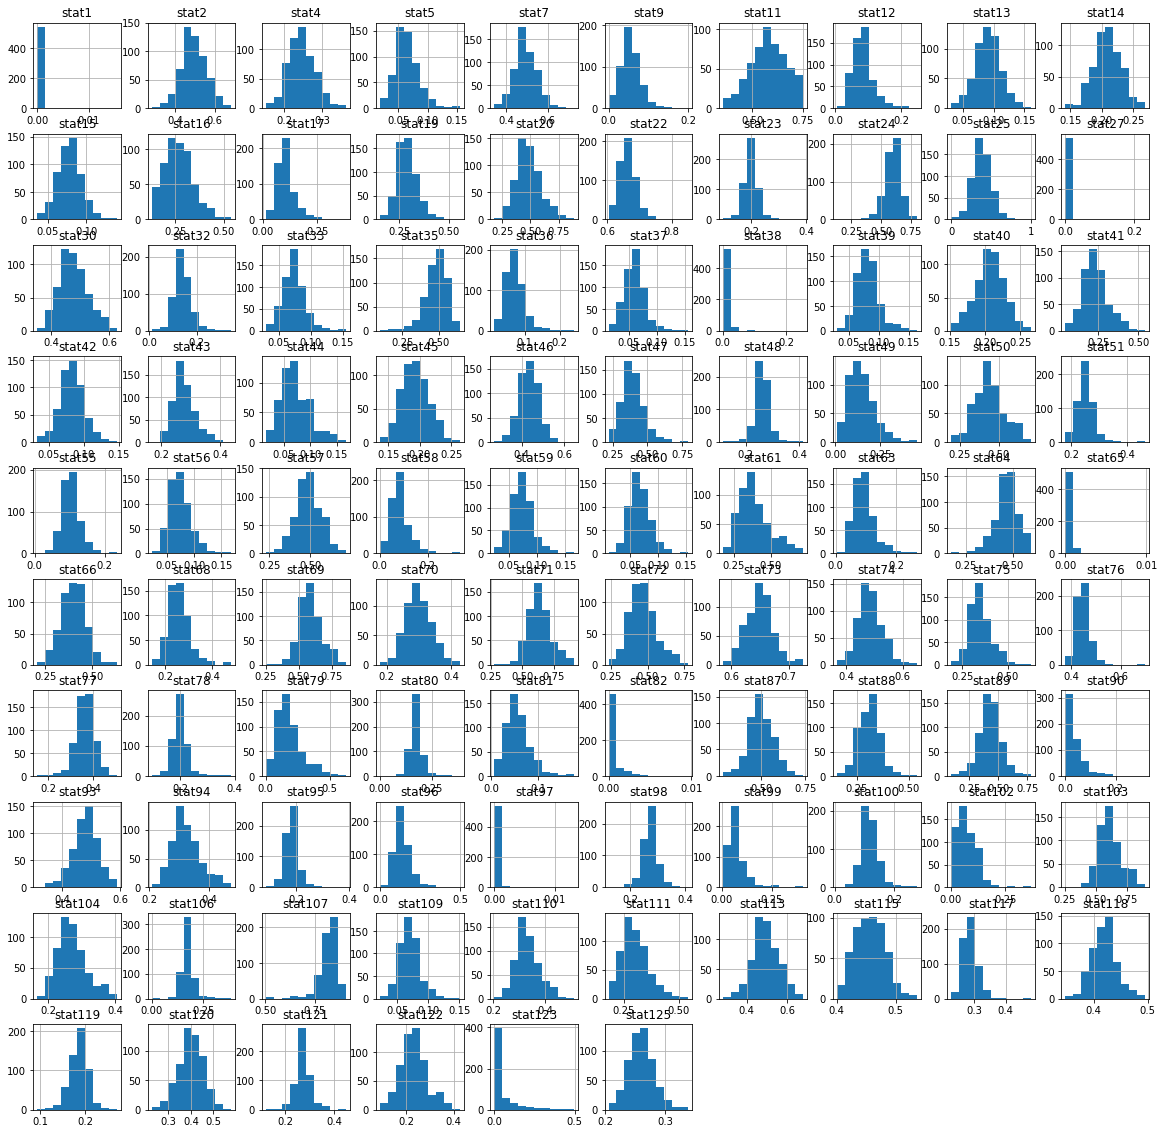

In [329]:
# отобразим распределения

data_stat.hist(figsize=(20,20))
plt.show()

**По словарю нормальности видно, что stat2, stat13, stat14 и ещё несколько атрибутов имеют распределение действительно близкое к нормальному, но таких НЕмного**

In [331]:
cor = data_stat.corr(method='spearman')

In [332]:
cor

,stat1,stat2,stat4,stat5,stat7,stat9,stat11,stat12,stat13,stat14,...,stat113,stat115,stat117,stat118,stat119,stat120,stat121,stat122,stat123,stat125
stat1,1.000000,-0.002814,0.156472,0.018689,0.058095,0.052795,-0.028668,0.112103,-0.085218,0.007276,...,-0.001931,0.052687,0.171733,0.101322,0.000597,-0.016882,-0.015357,-0.012757,0.226454,-0.031692
stat2,-0.002814,1.000000,0.197933,0.110977,0.159961,0.079602,0.136070,0.099362,0.063461,-0.121290,...,0.998722,0.233766,-0.040019,-0.053643,0.137752,-0.277448,-0.008584,0.122698,-0.178121,-0.100623
stat4,0.156472,0.197933,1.000000,0.086778,0.191411,0.068297,-0.237214,0.160834,0.141090,-0.309304,...,0.195837,0.495821,-0.079510,-0.278556,0.268402,0.030177,0.116103,0.201608,0.116219,-0.145358
stat5,0.018689,0.110977,0.086778,1.000000,0.169028,0.403212,-0.074209,0.121295,0.284013,-0.189191,...,0.115164,0.152414,0.125013,0.086894,0.286664,-0.021107,0.134285,0.227104,-0.012561,0.088034
stat7,0.058095,0.159961,0.191411,0.169028,1.000000,0.158767,0.276914,0.488960,0.180072,-0.404077,...,0.160161,0.707534,-0.163072,-0.021164,0.272692,-0.180857,0.074032,0.350828,-0.116874,-0.340742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stat120,-0.016882,-0.277448,0.030177,-0.021107,-0.180857,-0.063469,-0.323124,-0.036887,0.007836,0.048662,...,-0.274819,-0.231400,-0.226838,-0.400318,-0.094254,1.000000,0.004406,-0.098907,0.160520,-0.111923
stat121,-0.015357,-0.008584,0.116103,0.134285,0.074032,0.169729,-0.254831,0.091981,0.286691,-0.243939,...,-0.011955,0.136783,0.122356,0.070175,0.638228,0.004406,1.000000,0.318002,0.082661,0.132529
stat122,-0.012757,0.122698,0.201608,0.227104,0.350828,0.214861,-0.198872,0.000145,0.406398,-0.334149,...,0.123978,0.360788,0.043729,0.069735,0.627428,-0.098907,0.318002,1.000000,0.078038,0.033014
stat123,0.226454,-0.178121,0.116219,-0.012561,-0.116874,-0.011449,-0.353885,-0.030660,0.080940,-0.009162,...,-0.182903,-0.015523,0.130551,0.071136,0.016333,0.160520,0.082661,0.078038,1.000000,0.132983


In [384]:
# создаём резервную копию, чтобы входе экспериментов ещё раз не перезапускать всё сызнова
data_stat_copy = data_stat.copy(deep=True)

In [385]:
data_stat_copy

,stat1,stat2,stat4,stat5,stat7,stat9,stat11,stat12,stat13,stat14,...,stat113,stat115,stat117,stat118,stat119,stat120,stat121,stat122,stat123,stat125
0,0.000057,0.463585,0.269454,0.080972,0.480818,0.058824,0.428506,0.098841,0.117632,0.185914,...,0.461219,0.464881,0.304522,0.433083,0.189568,0.393393,0.295057,0.251447,0.217143,0.287408
1,0.000258,0.451477,0.280188,0.053763,0.449686,0.060870,0.557598,0.084276,0.051277,0.242729,...,0.449231,0.447159,0.282449,0.419728,0.156165,0.403475,0.232939,0.149836,0.136318,0.242417
2,0.000000,0.394161,0.259720,0.093137,0.498138,0.060150,0.553648,0.056404,0.115620,0.214368,...,0.395091,0.458876,0.290208,0.424702,0.178597,0.374286,0.263825,0.258818,0.264657,0.264686
3,0.000000,0.595941,0.285093,0.106122,0.409406,0.094595,0.503968,0.044787,0.123180,0.237851,...,0.589512,0.421272,0.280153,0.405199,0.223855,0.410256,0.334586,0.270078,0.002787,0.250378
4,0.000053,0.474469,0.237012,0.069284,0.464455,0.069588,0.584513,0.059305,0.120600,0.211230,...,0.473045,0.435530,0.307592,0.447303,0.200082,0.364122,0.272970,0.307973,0.010024,0.284349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.000189,0.534304,0.303557,0.075136,0.627917,0.068460,0.708891,0.197239,0.084507,0.177097,...,0.529709,0.499697,0.273874,0.395435,0.186000,0.436798,0.266040,0.243204,0.001825,0.235458
543,0.000308,0.458941,0.219156,0.051532,0.449095,0.034483,0.497431,0.067077,0.087003,0.203899,...,0.456048,0.447270,0.316664,0.427721,0.168777,0.506645,0.230414,0.209977,0.372106,0.278913
544,0.000062,0.605558,0.286586,0.049505,0.417582,0.022222,0.435908,0.039554,0.093642,0.243505,...,0.600606,0.430091,0.240316,0.358848,0.188563,0.465753,0.257146,0.257113,0.008716,0.221611
545,0.000000,0.437931,0.251155,0.049327,0.672457,0.035714,0.674585,0.222500,0.099401,0.182381,...,0.434537,0.505311,0.259435,0.414645,0.202812,0.293333,0.338469,0.232558,0.003523,0.224957


In [386]:
def get_corr(data, margin):
    
    '''
    Input:
        data - датафрейм
        margin - порог, начиная с которого атрибуты рассматриваются как сильноскоррелированные

    Output:
        all_cor - серия, где мультииндексы - названия столцов, а столбец - значения корреляции
    '''       
    
    cor = data.corr(method='spearman')
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    all_cor = c1[c1.values != 1]   
    all_cor = all_cor[abs(all_cor) > margin]
    
    print(len(all_cor), '- количество пар')
    
    return all_cor

In [387]:
all_cor = get_corr(data_stat_copy, 0.7)

118 - количество пар


In [388]:
all_cor

stat113  stat2      0.998722
stat75   stat19     0.991907
stat43   stat110    0.990245
stat104  stat94     0.988628
stat4    stat70     0.988240
                      ...   
stat93   stat46    -0.752057
stat45   stat115   -0.777190
stat111  stat11    -0.898296
stat11   stat16    -0.914992
stat35   stat47    -0.933516
Length: 118, dtype: float64

In [389]:
# выносим значения мультииндексов в отдельный столбец

all_cor = pd.DataFrame(all_cor)
all_cor['index'] = all_cor.index.to_numpy()

print(all_cor.values[0][1])

all_cor.head()

('stat113', 'stat2')


,,0,index
stat113,stat2,0.998722,"(stat113, stat2)"
stat75,stat19,0.991907,"(stat75, stat19)"
stat43,stat110,0.990245,"(stat43, stat110)"
stat104,stat94,0.988628,"(stat104, stat94)"
stat4,stat70,0.988240,"(stat4, stat70)"


In [390]:
# получаем массив из пар атрибутов с высокой корреляцией

cor_val = all_cor.values
cor_val[:5]

array([[0.9987217073874628, ('stat113', 'stat2')],
       [0.9919068423252899, ('stat75', 'stat19')],
       [0.9902449596734282, ('stat43', 'stat110')],
       [0.9886275817266833, ('stat104', 'stat94')],
       [0.9882398119056177, ('stat4', 'stat70')]], dtype=object)

In [391]:
data_stat.head()

,stat1,stat2,stat4,stat5,stat7,stat9,stat11,stat12,stat13,stat14,...,stat113,stat115,stat117,stat118,stat119,stat120,stat121,stat122,stat123,stat125
0,0.000057,0.463585,0.269454,0.080972,0.480818,0.058824,0.428506,0.098841,0.117632,0.185914,...,0.461219,0.464881,0.304522,0.433083,0.189568,0.393393,0.295057,0.251447,0.217143,0.287408
1,0.000258,0.451477,0.280188,0.053763,0.449686,0.060870,0.557598,0.084276,0.051277,0.242729,...,0.449231,0.447159,0.282449,0.419728,0.156165,0.403475,0.232939,0.149836,0.136318,0.242417
2,0.000000,0.394161,0.259720,0.093137,0.498138,0.060150,0.553648,0.056404,0.115620,0.214368,...,0.395091,0.458876,0.290208,0.424702,0.178597,0.374286,0.263825,0.258818,0.264657,0.264686
3,0.000000,0.595941,0.285093,0.106122,0.409406,0.094595,0.503968,0.044787,0.123180,0.237851,...,0.589512,0.421272,0.280153,0.405199,0.223855,0.410256,0.334586,0.270078,0.002787,0.250378
4,0.000053,0.474469,0.237012,0.069284,0.464455,0.069588,0.584513,0.059305,0.120600,0.211230,...,0.473045,0.435530,0.307592,0.447303,0.200082,0.364122,0.272970,0.307973,0.010024,0.284349


In [392]:
# Функция удаления сильно коррелированных столбцов

def del_cor_col(data):
    
    '''
    Input:
        data - датафрейм

    '''     

    for st in cor_val:
        rand_num = np.random.randint(0,2)
        try:
            col_name = st[1][rand_num]
            del_col([col_name], data)
        except:
            pass


In [393]:
# Функция удаления сильно коррелированных столбцов

del_cor_col(data_stat_copy)

In [395]:
data_stat_copy

,stat1,stat4,stat5,stat9,stat13,stat14,stat20,stat24,stat25,stat27,...,stat88,stat90,stat96,stat97,stat99,stat102,stat106,stat107,stat120,stat125
0,0.000057,0.269454,0.080972,0.058824,0.117632,0.185914,0.398551,0.573705,0.250000,0.000361,...,0.312000,0.009780,0.096154,0.000000,0.042843,0.066170,0.175237,0.822640,0.393393,0.287408
1,0.000258,0.280188,0.053763,0.060870,0.051277,0.242729,0.496815,0.502732,0.370370,0.007157,...,0.328145,0.012552,0.033708,0.000551,0.259505,0.159016,0.157085,0.648822,0.403475,0.242417
2,0.000000,0.259720,0.093137,0.060150,0.115620,0.214368,0.558442,0.535248,0.433333,0.000000,...,0.312500,0.002382,0.046729,0.000000,0.020540,0.101237,0.158733,0.842609,0.374286,0.264686
3,0.000000,0.285093,0.106122,0.094595,0.123180,0.237851,0.500000,0.504505,0.272727,0.000391,...,0.366762,0.020422,0.097345,0.000000,0.072510,0.079663,0.208824,0.802496,0.410256,0.250378
4,0.000053,0.237012,0.069284,0.069588,0.120600,0.211230,0.446394,0.553454,0.385965,0.000000,...,0.319209,0.013183,0.173448,0.000000,0.032096,0.119589,0.170557,0.830328,0.364122,0.284349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.000189,0.303557,0.075136,0.068460,0.084507,0.177097,0.696296,0.568486,0.364486,0.000146,...,0.248963,0.035882,0.182609,0.000219,0.072280,0.071032,0.206198,0.824445,0.436798,0.235458
543,0.000308,0.219156,0.051532,0.034483,0.087003,0.203899,0.365145,0.559184,0.321429,0.000000,...,0.340877,0.017344,0.058824,0.000000,0.046656,0.112463,0.183165,0.829726,0.506645,0.278913
544,0.000062,0.286586,0.049505,0.022222,0.093642,0.243505,0.582255,0.524788,0.333333,0.000081,...,0.271698,0.016413,0.100213,0.000000,0.052047,0.083898,0.163522,0.824682,0.465753,0.221611
545,0.000000,0.251155,0.049327,0.035714,0.099401,0.182381,0.661765,0.557895,0.250000,0.000000,...,0.248408,0.044903,0.140187,0.000000,0.093682,0.023256,0.145484,0.766976,0.293333,0.224957


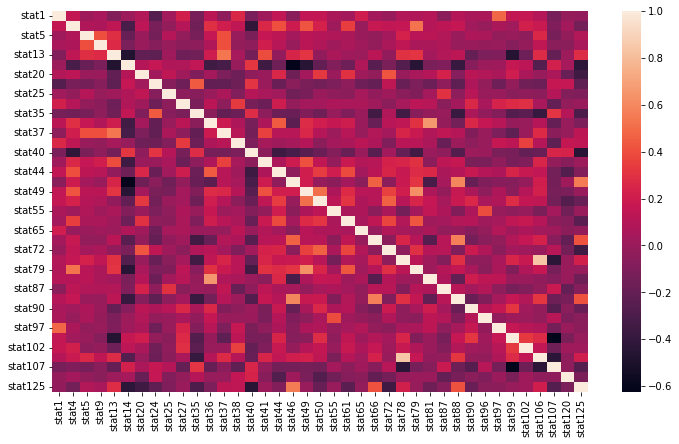

In [397]:
# Визуализируем корреляцию Спирмена

plt.figure(figsize=(12,7))
sns.heatmap(data_stat_copy.corr(method='spearman'))
plt.show()

**Видим, что сильной корреляции между атрибутами больше НЕ наблюдается**

In [398]:
#spearmanr(data_stat_copy['stat80'],data_stat_copy['stat106'])
#del_col(['stat106'], data_stat_copy)

In [399]:
X = data_stat_copy.values
X.shape

(547, 39)

In [400]:
y = data['player'].values
y[:10]

array(['player1', 'player2', 'player3', 'player4', 'player5', 'player6',
       'player7', 'player8', 'player9', 'player10'], dtype=object)

# Кластеризация

## Подберём оптимальное кол-во кластеров по правилу локтя

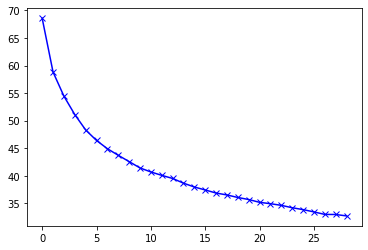

In [407]:
# В качесте алгоритма кластеризации возьмём "метод k-средних"

n_clusters = 30               
cost = []                     
for i in range(1,n_clusters): 
    kmean = KMeans(i)           
    kmean.fit(X)   
    cost.append(kmean.inertia_) 
  
# inertia_ - это среднее растояние от точек до центров их классов
# Будем его использовать для подбора оптимального количества классов 

# Отобразим значения списка cost на графике
plt.plot(cost, 'bx-')
plt.show()

**Возьмём 6 кластеров за основу, так как перелом наблюдается при данном количестве**

In [408]:
# Получаем метки кластеров

num_clust = 6
kmean = KMeans(num_clust)
kmean.fit(X)
labels = kmean.labels_
print(labels)

[5 2 4 5 1 5 1 4 4 1 1 1 4 2 5 5 4 0 0 1 1 5 4 5 0 5 4 5 5 4 0 1 5 5 4 4 5
 0 5 4 0 5 5 0 4 5 4 5 4 4 4 3 1 4 4 0 5 0 1 4 0 1 0 5 1 1 5 5 2 5 1 4 5 1
 4 0 5 1 5 0 1 0 1 4 0 4 0 5 4 2 1 0 5 5 0 5 1 1 0 5 5 1 0 1 1 5 3 2 5 0 5
 5 0 2 0 1 1 5 1 4 0 4 3 4 0 0 5 1 1 4 1 0 0 5 5 4 5 3 5 4 4 1 5 5 0 0 0 0
 2 1 2 0 4 0 0 3 5 0 5 5 0 0 2 4 5 1 0 2 5 0 1 4 5 3 4 0 0 5 1 1 1 1 0 0 1
 1 0 1 0 1 0 4 5 0 0 5 5 5 1 4 5 1 5 3 5 1 1 0 1 1 5 5 0 4 5 1 4 4 1 0 4 1
 5 4 1 1 0 3 0 5 0 4 1 3 0 1 2 5 1 1 5 5 0 5 4 3 4 1 4 4 0 5 1 1 1 5 5 5 5
 1 1 5 4 5 1 4 0 4 0 3 4 0 5 2 0 0 2 1 5 0 3 0 5 5 4 1 1 1 4 4 4 1 1 4 1 0
 3 4 1 1 5 4 4 1 4 0 1 0 5 3 4 5 1 5 4 3 4 5 1 1 5 3 0 4 1 1 5 0 1 0 0 1 4
 5 0 0 1 2 5 1 1 2 1 0 0 0 0 5 4 0 4 5 3 1 4 4 0 5 1 5 4 4 2 0 4 4 0 4 1 1
 4 1 1 0 1 4 1 5 4 4 5 3 4 4 4 3 2 3 0 5 0 5 3 0 5 0 0 1 0 0 1 0 1 4 5 5 4
 5 2 1 5 3 4 4 4 1 1 5 1 1 1 3 5 0 5 5 0 0 1 3 4 2 5 4 1 2 1 0 1 2 5 4 0 5
 5 4 4 2 1 1 5 4 4 5 1 0 4 1 1 3 0 1 0 1 0 2 5 4 4 5 5 1 0 0 1 5 5 2 5 0 1
 4 4 5 4 5 0 4 4 5 2 4 5 

In [547]:
set(labels)

{0, 1, 2, 3, 4, 5}

In [409]:
data_stat_copy.head()

,stat1,stat4,stat5,stat9,stat13,stat14,stat20,stat24,stat25,stat27,...,stat88,stat90,stat96,stat97,stat99,stat102,stat106,stat107,stat120,stat125
0,0.000057,0.269454,0.080972,0.058824,0.117632,0.185914,0.398551,0.573705,0.250000,0.000361,...,0.312000,0.009780,0.096154,0.000000,0.042843,0.066170,0.175237,0.822640,0.393393,0.287408
1,0.000258,0.280188,0.053763,0.060870,0.051277,0.242729,0.496815,0.502732,0.370370,0.007157,...,0.328145,0.012552,0.033708,0.000551,0.259505,0.159016,0.157085,0.648822,0.403475,0.242417
2,0.000000,0.259720,0.093137,0.060150,0.115620,0.214368,0.558442,0.535248,0.433333,0.000000,...,0.312500,0.002382,0.046729,0.000000,0.020540,0.101237,0.158733,0.842609,0.374286,0.264686
3,0.000000,0.285093,0.106122,0.094595,0.123180,0.237851,0.500000,0.504505,0.272727,0.000391,...,0.366762,0.020422,0.097345,0.000000,0.072510,0.079663,0.208824,0.802496,0.410256,0.250378
4,0.000053,0.237012,0.069284,0.069588,0.120600,0.211230,0.446394,0.553454,0.385965,0.000000,...,0.319209,0.013183,0.173448,0.000000,0.032096,0.119589,0.170557,0.830328,0.364122,0.284349


In [410]:
len(labels)

547

In [526]:
# по старинке делаем копию
data_test = data_stat_copy.copy(deep=True)

In [527]:
data_test.head()

,stat1,stat4,stat5,stat9,stat13,stat14,stat20,stat24,stat25,stat27,...,stat88,stat90,stat96,stat97,stat99,stat102,stat106,stat107,stat120,stat125
0,0.000057,0.269454,0.080972,0.058824,0.117632,0.185914,0.398551,0.573705,0.250000,0.000361,...,0.312000,0.009780,0.096154,0.000000,0.042843,0.066170,0.175237,0.822640,0.393393,0.287408
1,0.000258,0.280188,0.053763,0.060870,0.051277,0.242729,0.496815,0.502732,0.370370,0.007157,...,0.328145,0.012552,0.033708,0.000551,0.259505,0.159016,0.157085,0.648822,0.403475,0.242417
2,0.000000,0.259720,0.093137,0.060150,0.115620,0.214368,0.558442,0.535248,0.433333,0.000000,...,0.312500,0.002382,0.046729,0.000000,0.020540,0.101237,0.158733,0.842609,0.374286,0.264686
3,0.000000,0.285093,0.106122,0.094595,0.123180,0.237851,0.500000,0.504505,0.272727,0.000391,...,0.366762,0.020422,0.097345,0.000000,0.072510,0.079663,0.208824,0.802496,0.410256,0.250378
4,0.000053,0.237012,0.069284,0.069588,0.120600,0.211230,0.446394,0.553454,0.385965,0.000000,...,0.319209,0.013183,0.173448,0.000000,0.032096,0.119589,0.170557,0.830328,0.364122,0.284349


In [528]:
# добавляем метки к основной таблице

data_test['labels'] = labels
data_test.head()

,stat1,stat4,stat5,stat9,stat13,stat14,stat20,stat24,stat25,stat27,...,stat90,stat96,stat97,stat99,stat102,stat106,stat107,stat120,stat125,labels
0,0.000057,0.269454,0.080972,0.058824,0.117632,0.185914,0.398551,0.573705,0.250000,0.000361,...,0.009780,0.096154,0.000000,0.042843,0.066170,0.175237,0.822640,0.393393,0.287408,5
1,0.000258,0.280188,0.053763,0.060870,0.051277,0.242729,0.496815,0.502732,0.370370,0.007157,...,0.012552,0.033708,0.000551,0.259505,0.159016,0.157085,0.648822,0.403475,0.242417,2
2,0.000000,0.259720,0.093137,0.060150,0.115620,0.214368,0.558442,0.535248,0.433333,0.000000,...,0.002382,0.046729,0.000000,0.020540,0.101237,0.158733,0.842609,0.374286,0.264686,4
3,0.000000,0.285093,0.106122,0.094595,0.123180,0.237851,0.500000,0.504505,0.272727,0.000391,...,0.020422,0.097345,0.000000,0.072510,0.079663,0.208824,0.802496,0.410256,0.250378,5
4,0.000053,0.237012,0.069284,0.069588,0.120600,0.211230,0.446394,0.553454,0.385965,0.000000,...,0.013183,0.173448,0.000000,0.032096,0.119589,0.170557,0.830328,0.364122,0.284349,1


In [563]:
# Функция печати информации о кластере

def printCluster(x, dec):
    
    '''
    Input:
        x - массив значений текущего кластера
        dec - количество знаков после запятой
    Output:
        np_all - массив из 4 строк и 39 стобцов. Для каждго кластера подсчитывается по всем 39 stat среднее,
        минимальное, максимальное и стандартное
    '''       
    
    print("Размер кластера:", x.shape[0]) # Выведем количество элементов в кластере
  
    mX   = x.mean(axis=0)              # Считаем среднее значение по кластеру  
    mX = np.around(mX, decimals = dec)
    mX = mX.reshape(1, mX.shape[0])
    
    minX = x.min(axis=0)               # Находим минимальное значение в кластере
    minX = np.around(minX, decimals = dec)
    minX = minX.reshape(1, minX.shape[0])
    
    maxX = x.max(axis=0)               # Находим максимальное значение в кластере
    maxX = np.around(maxX, decimals = dec)
    maxX = maxX.reshape(1, maxX.shape[0])
    
    stdX = x.std(axis=0)               # Находим стандартное отклонение элементов кластера
    stdX = np.around(stdX, decimals = dec)    
    stdX = stdX.reshape(1, stdX.shape[0])
    
    l_np = [mX, minX, maxX, stdX]
    
    np_all = reduce(lambda n1,n2: np.concatenate((n1,n2), axis=0), l_np) 

#    print(mX)
#    print(minX)
#    print(maxX)
#    print(stdX)
    
    return np_all

In [564]:
# Функция визуализации среднего, минимального, максимального и стандартного отклонения 
# stat в каждом кластере

def show_clust_inf(data, labels, dec):
    
    '''
    Input:
        data - фрейм
        labels - метки кластеров
        dec - значение для округления
    '''       

    for n in set(labels):
        
        clust = data[data['labels'] == n]
        del_col(['labels'], clust)

        clust_v = clust.values

        clust_inf = printCluster(clust_v, dec)

        plt.figure(figsize=(10,10))
        plt.imshow(clust_inf, cmap='rainbow') #interpolation='nearest', )
        plt.colorbar(location='right', anchor=(0, 0.5), shrink=0.1)
        plt.show()


Размер кластера: 113


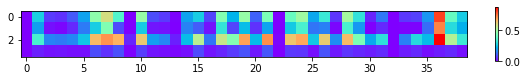

Размер кластера: 133


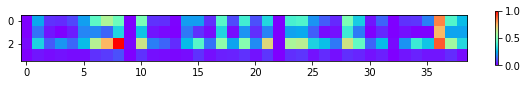

Размер кластера: 27


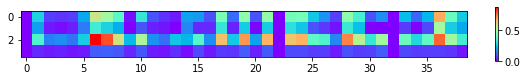

Размер кластера: 29


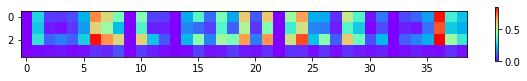

Размер кластера: 113


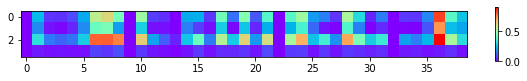

Размер кластера: 132


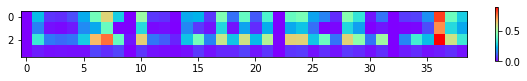

In [565]:
# визуализируем информацию о каждом кластере

show_clust_inf(data_test, labels, 5)

**По данным изображениям можно проследить интенсивность того или иного stat (показателя) игроков. Например, показатель stat107 особенно ярко выражен у групп 0,3,4,5, что является показателем того, что игроки данных групп часто прибегали к даннуму роду действий.**

# Создание финальной таблицы

In [570]:
pd_fin = pd.DataFrame({'groupNum':labels, 'player':player})
pd_fin

,groupNum,player
0,5,player1
1,2,player2
2,4,player3
3,5,player4
4,1,player5
...,...,...
542,4,player543
543,5,player544
544,0,player545
545,3,player546


In [572]:
pd_fin.to_csv('group_play.csv', index=False)